#### <center> Bagging and Pasting
Decision Tree ensemble is trained on feature set 1

## <font color='royalblue'> Get the data </p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from time import time
import pickle  
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%store -r
%store

Stored variables and their in-db values:
X_16_val                  -> array([[ 0.10924883,  1.83030605, -0.14807631, ...
X_32_val                  -> array([[ 0.66944195,  0.46536115,  0.79919788, ...
X_32test_std              -> defaultdict(<class 'list'>, {0: array([[ 0.6694419
X_32train_std             -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
X_test                    -> defaultdict(<class 'list'>, {0: array([[[ -6.40490
X_test_std                -> defaultdict(<class 'list'>, {0: array([[ 0.1092488
X_train                   -> array([[[ 0.00119031,  0.00873315,  0.00641749, ..
X_train_std               -> array([[-0.74031227,  0.0126481 , -0.30967801, ...
snrs                      -> [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 
y_16_val                  -> array([6, 6, 5, ..., 0, 4, 1])
y_32_test                 -> defaultdict(<class 'list'>, {0: array([2, 2, 4, ..
y_32_train                -> array([0, 3, 4, ..., 0, 3, 1])
y_32_val                  -> array([2, 

In [2]:
print("Training data: ", X_train_std.shape, "and labels: ", y_train.shape)
print(" ")
print("Test data:")
print("Total", len(X_test_std), X_test_std[18].shape, "arrays for SNR values:")
print(X_test_std.keys())

Training data:  (80000, 16) and labels:  (80000,)
 
Test data:
Total 20 (4000, 16) arrays for SNR values:
dict_keys([0, -16, 2, 4, 6, 8, 12, 10, -20, -14, -18, 16, 18, -12, 14, -10, -8, -6, -4, -2])


## <font color='royalblue'>Train and test the classifiers

In [3]:
#Train the classifier

bagg_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, n_estimators=400, max_samples=100)
paste_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=False, n_estimators=400, max_samples=100)

start = time()
bagg_clf.fit(X_train_std, y_train)  
print("Bagging: training took %.2f seconds"%(time() - start))
print("BaggingClassifier:")
print(bagg_clf)

print(" ")

start = time()
paste_clf.fit(X_train_std, y_train)  
print("Pasting: training took %.2f seconds"%(time() - start))
print("PastingClassifier:")
print(paste_clf)

Bagging: training took 7.99 seconds
BaggingClassifier:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=400, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 
Pasting: training took 7.47 seconds
PastingClassifier:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),

In [5]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy_bagg = defaultdict(list)

print("Test bagging classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = bagg_clf.predict(X_test_std[snr])
    accuracy_bagg[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("Accuracy on %d dB SNR samples = "%(snr), accuracy_bagg[snr])   
    
accuracy_bagg = collections.OrderedDict(sorted(accuracy_bagg.items()))  #sort by ascending SNR value

Test bagging classifier
 
Accuracy on -20 dB SNR samples =  0.12375
Accuracy on -18 dB SNR samples =  0.1255
Accuracy on -16 dB SNR samples =  0.13725
Accuracy on -14 dB SNR samples =  0.13825
Accuracy on -12 dB SNR samples =  0.15975
Accuracy on -10 dB SNR samples =  0.1815
Accuracy on -8 dB SNR samples =  0.242
Accuracy on -6 dB SNR samples =  0.30425
Accuracy on -4 dB SNR samples =  0.35025
Accuracy on -2 dB SNR samples =  0.39475
Accuracy on 0 dB SNR samples =  0.44425
Accuracy on 2 dB SNR samples =  0.562
Accuracy on 4 dB SNR samples =  0.7415
Accuracy on 6 dB SNR samples =  0.7735
Accuracy on 8 dB SNR samples =  0.785
Accuracy on 10 dB SNR samples =  0.783
Accuracy on 12 dB SNR samples =  0.79125
Accuracy on 14 dB SNR samples =  0.7925
Accuracy on 16 dB SNR samples =  0.7865
Accuracy on 18 dB SNR samples =  0.78675


In [7]:
#Test the classifier

import collections

y_pred = defaultdict(list)
accuracy_paste = defaultdict(list)

print("Test pasting classifier")
print(" ")
for snr in snrs:
    y_pred[snr] = paste_clf.predict(X_test_std[snr])
    accuracy_paste[snr] = metrics.accuracy_score(y_test[snr], y_pred[snr])
    print("Accuracy on %d dB SNR samples = "%(snr), accuracy_paste[snr])   
    
accuracy_paste = collections.OrderedDict(sorted(accuracy_paste.items()))  #sort by ascending SNR value

Test pasting classifier
 
Accuracy on -20 dB SNR samples =  0.13
Accuracy on -18 dB SNR samples =  0.12925
Accuracy on -16 dB SNR samples =  0.1315
Accuracy on -14 dB SNR samples =  0.12325
Accuracy on -12 dB SNR samples =  0.15175
Accuracy on -10 dB SNR samples =  0.18475
Accuracy on -8 dB SNR samples =  0.2595
Accuracy on -6 dB SNR samples =  0.30775
Accuracy on -4 dB SNR samples =  0.34775
Accuracy on -2 dB SNR samples =  0.3845
Accuracy on 0 dB SNR samples =  0.4425
Accuracy on 2 dB SNR samples =  0.56875
Accuracy on 4 dB SNR samples =  0.7475
Accuracy on 6 dB SNR samples =  0.7795
Accuracy on 8 dB SNR samples =  0.78175
Accuracy on 10 dB SNR samples =  0.79025
Accuracy on 12 dB SNR samples =  0.7835
Accuracy on 14 dB SNR samples =  0.79525
Accuracy on 16 dB SNR samples =  0.79025
Accuracy on 18 dB SNR samples =  0.79125


## <font color='royalblue'> Visualize classifier performance

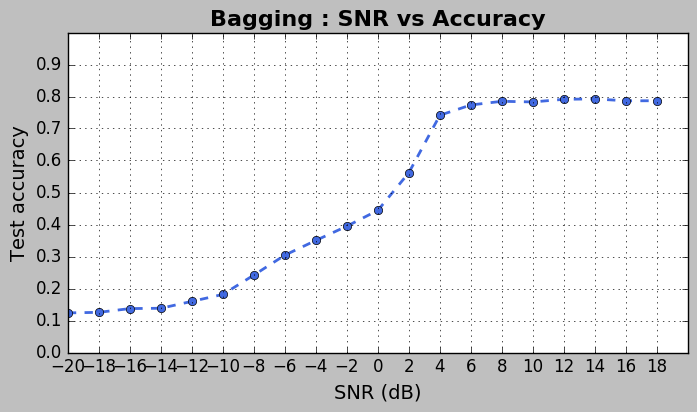

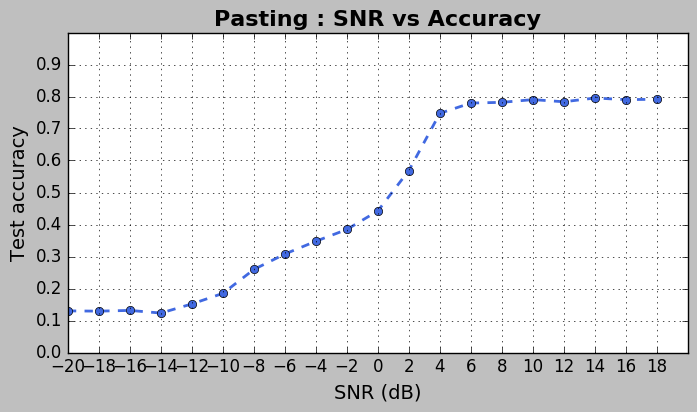

In [9]:
#Visualize the performance 

plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy_bagg.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('Bagging : SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()
#----------------------------------------------------------

plt.style.use('classic')

fig = plt.figure(figsize=(8, 4), dpi=100)
x = snrs
y = list(accuracy_paste.values())
plt.plot(x, y, marker="o", linewidth=2.0, linestyle='dashed', color='royalblue')
plt.axis([-20, 20, 0, 1])
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(0, 1, 0.10))

ttl = plt.title('Pasting : SNR vs Accuracy', fontsize=16)
ttl.set_weight('bold')
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Test accuracy', fontsize=14)
plt.grid()

plt.show()